<a href="https://colab.research.google.com/github/LetiGaray/IngeniasGrupo4/blob/main/Health_Analysis_%26_Prediction_(%C3%A1rbol_de_decisi%C3%B3n_etc).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grupo 4 🐼
## (Avalos - Espinoza - Garay - Humbert  - Stremel)
### Objetivo: analizar el impacto de factores socioeconómicos y de estilo de vida en el riesgo de infarto, y cómo estos factores pueden variar según diferentes regiones geográficas y demográficas.
#### Subobjetivos
* **Identificar factores de riesgo clave**: Determinar cuáles de las variables (como diabetes, historial familiar, tabaquismo, obesidad, etc.) tienen una mayor influencia en el riesgo de infarto.
* **Evaluar diferencias regionales**: Investigar cómo varían estos factores de riesgo según el país, continente y hemisferio.
* **Impacto socioeconómico**: Analizar la relación entre el nivel de ingresos y el riesgo de infarto.
* **Estilo de vida y salud**: Evaluar cómo las variables relacionadas con el estilo de vida (ejercicio, consumo de alcohol, dieta, horas de sueño, etc.) afectan el riesgo de infarto.
* **Desigualdades de salud**: Identificar posibles desigualdades en el riesgo de infarto según el sexo y la edad.

In [1]:
#importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#importo el dataset > heart_attack_prediction_dataset
df = pd.read_csv('heart_attack_prediction_dataset.csv', delimiter=',')

In [6]:
hap = df

In [ ]:
#visualizamos el dataframe > filas&columnas para inspeccionar
hap.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [10]:
#cantidad de filas y columnas
num_filas, num_columnas = hap.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 1649
Número de columnas: 22


In [9]:
# Eliminamos filas con valores nulos para limpieza inicial
hap = hap.dropna()

In [ ]:
#Chequeamos que los tipos de datos sean correctos
hap.dtypes

,0
Country,object
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64


In [13]:
print(hap.columns.tolist())


['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [20]:
import pandas as pd

translation_dict = {
    'Country': 'País',
    'Year': 'Año',
    'Status': 'Estado',
    'Life expectancy ': 'Esperanza de vida',
    'Adult Mortality': 'Mortalidad en adultos',
    'infant deaths': 'Muertes infantiles',
    'Alcohol': 'Alcohol',
    'percentage expenditure': 'Gasto porcentual',
    'Hepatitis B': 'Hepatitis B',
    'Measles ': 'Sarampión',
    ' BMI ': 'IMC',
    'under-five deaths ': 'Muertes menores de cinco años',
    'Polio': 'Polio',
    'Total expenditure': 'Gasto total',
    'Diphtheria ': 'Difteria',
    ' HIV/AIDS': 'VIH/SIDA',
    'GDP': 'PIB',
    'Population': 'Población',
    ' thinness  1-19 years': 'Delgadez 1-19 años',
    ' thinness 5-9 years': 'Delgadez 5-9 años',
    'Income composition of resources': 'Composición de ingresos de los recursos',
    'Schooling': 'Educación'
}
# Esto cambiará los nombres de las columnas para que estén en español.
hap = hap.rename(columns=translation_dict)
print(hap.columns.tolist())

['País', 'Año', 'Estado', 'Esperanza de vida', 'Mortalidad en adultos', 'Muertes infantiles', 'Alcohol', 'Gasto porcentual', 'Hepatitis B', 'Sarampión', 'IMC', 'Muertes menores de cinco años', 'Polio', 'Gasto total', 'Difteria', 'VIH/SIDA', 'PIB', 'Población', 'Delgadez 1-19 años', 'Delgadez 5-9 años', 'Composición de ingresos de los recursos', 'Educación']


##### >> Empezamos a visualizar los datos para analizarlos mejor

In [ ]:
# Países con mayor Riesgo de Ataques Cardíacos
# 1. contar la cantidad de paises totales para mostrar en 'Y'
# 2. sumar la cantidad de 'Riesgo de Ataque Cardíaco' por 'País'
# 3. mostrar los paises que tienen mayores valores en un top 5

count_country = hap["País"].value_counts()
sum_har = hap.groupby("País")["Riesgo de Ataque Cardíaco"].sum()
top_countries = sum_har.nlargest(5) # muestra el top 5 valores máx

plt.bar(top_countries.index,top_countries.values)
plt.xlabel("Países")
plt.ylabel("Recuento")
plt.title("Países con Mayor Riesgo de Ataques Cardíacos")
plt.show()

##### >> A partir del gráfico anterior, notamos que Argentina está en el 2do puesto de los países con mayor riesgo de ataques cardíacos. Vamos a seguir filtrando los datos a partir de Argentina para seguir analizando el resto de las variables

In [ ]:
#Filtrar datos por país
data_arg = hap[hap['País'] == 'Argentina']

#Inspeccionar el subconjunto filtrado
print(data_arg.head())

In [ ]:
#Descripción estadística en ARG
data_arg.describe()

In [ ]:
# Visualización de la distribución del riesgo de infarto
sns.histplot(data_arg['Riesgo de Ataque Cardíaco'], kde=True)
plt.title('Distribución del Riesgo de Infarto')
plt.xlabel('Riesgo de Infarto')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn
import pandas as pd

# Cargo el dataset y examino los datos que tengo
df = pd.read_csv('heart_attack_prediction_dataset.csv')

# Muestro las primeras filas del dataset
print(df.head())

# Muestro información general del dataset
print(df.info())

Error Cuadrático Medio: 6.51476109215017
Puntaje R^2: 0.9246843224667947


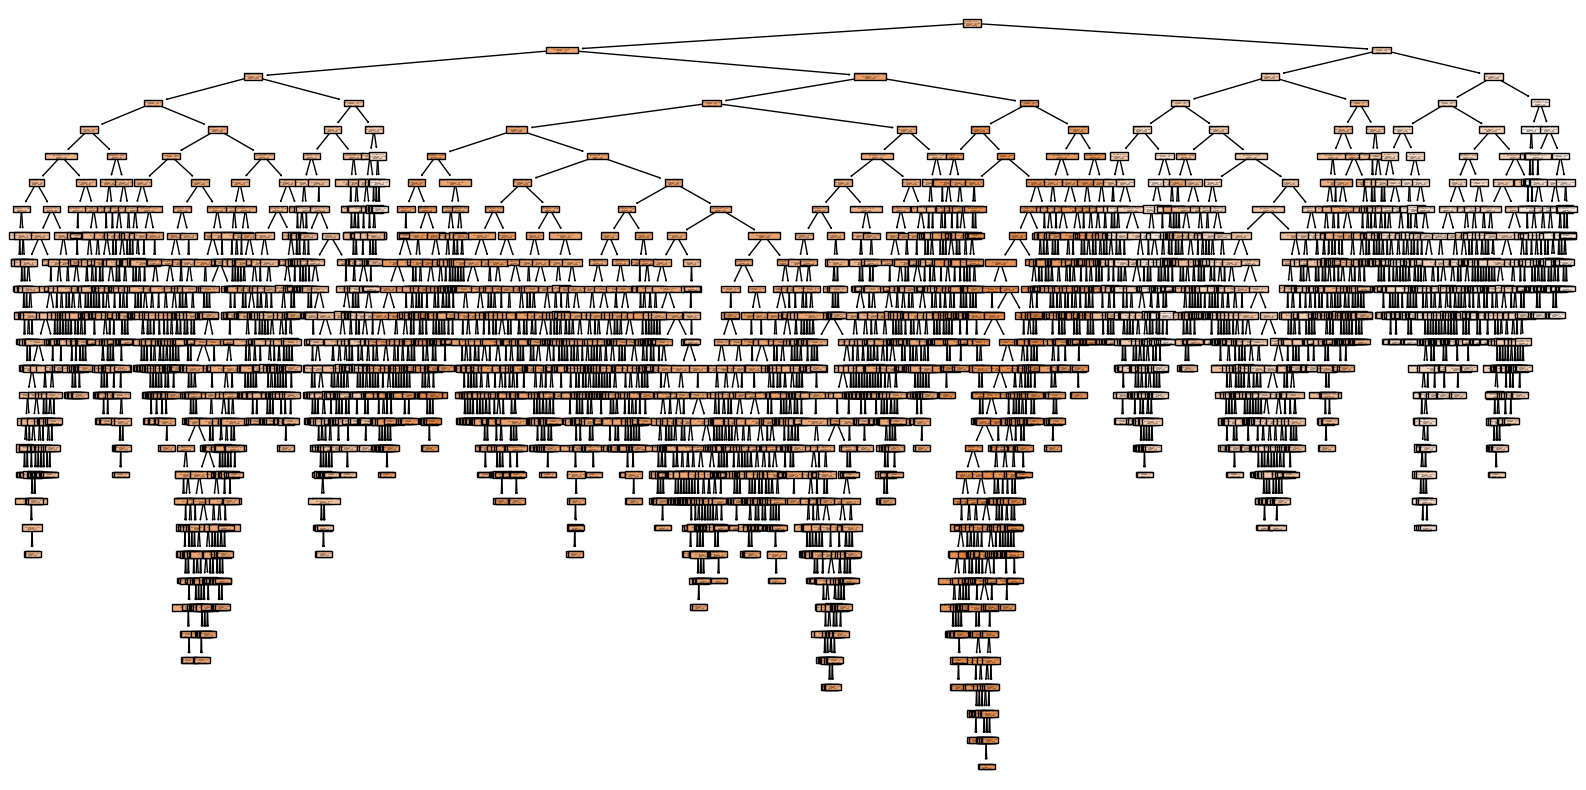

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import tree

# Cargo el dataset
df = pd.read_csv('heart_attack_prediction_dataset.csv')

# Limpio los nombres de columnas
df.columns = df.columns.str.strip()

# Ajusto el nombre de la columna que va a ser mi objetivo
column_target = 'Life expectancy'

# Elimino filas con valores faltantes en mi columna objetivo
df = df.dropna(subset=[column_target])

# Separo características y la columna objetivo
X = df.drop(column_target, axis=1)
y = df[column_target]

# Convierto variables categóricas a numéricas
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))

# Guardo los nombres de las columnas originales por si los necesito después
feature_names = X.columns

# Imputo valores faltantes en X
imputer_X = SimpleImputer(strategy='median')
X_imputed = imputer_X.fit_transform(X)  # Crear una versión imputada de X

# Imputo valores faltantes en y (ver si es necesario)
imputer_y = SimpleImputer(strategy='median')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Divido los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Creo y entreno un modelo de regresión
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Evalúo el modelo
y_pred = regressor.predict(X_test)
print('Error Cuadrático Medio:', mean_squared_error(y_test, y_pred))
print('Puntaje R^2:', r2_score(y_test, y_pred))

# Visualizo el árbol de decisión
plt.figure(figsize=(20,10))
tree.plot_tree(regressor, filled=True, feature_names=feature_names)
plt.show()

# Exporto las reglas del árbol de decisión en formato texto
tree_rules = export_text(regressor, feature_names=list(feature_names))
print(tree_rules)

Vemos que el modelo R^2 se acerca bastante a 1, por lo que el modelo tiene buen ajuste a los datos.

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [90]:
pip install pandas scikit-learn matplotlib graphviz

Valores nulos en las características después de limpieza:
Country                            0
Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64
Valores nulos en la variable objetivo después de limpieza:
0


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargué los datos desde el archivo CSV llamado 'heart_attack_prediction_dataset.csv'
df = pd.read_csv('heart_attack_prediction_dataset.csv')

# Verifico las primeras filas del DataFrame para asegurarme de que los datos se han cargado correctamente
print("Primeras filas del DataFrame:")
print(df.head())

# Imprimo los nombres de las columnas para verificar y ajustar si es necesario
print("\nNombres de las columnas:")
print(df.columns)

Primeras filas del DataFrame:
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS     

In [113]:
# Defino las características (X) y la variable objetivo (y)
X = df[['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']]
y = df['Status']  # Asegúrate de que 'Status' es la columna objetivo

In [114]:
# Separo columnas categóricas y numéricas
categorical_features = ['Country', 'Status']  # Ejemplo: ajusta según sea necesario
numeric_features = X.columns.difference(categorical_features)

In [115]:

# Preprocesamiento de datos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes con la media
            ('scaler', 'passthrough')  # No se necesita transformación adicional
        ]), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Codificación One-Hot para características categóricas
    ])


In [117]:
# Creo el pipeline con preprocesamiento y el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


In [118]:
# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [119]:
# Ajusto el pipeline con los datos de entrenamiento
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   'passthrough')]),
                                                  Index([' BMI ', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years',
       'Adult Mortality', 'Alcohol', 'Diphtheria ', 'GDP', 'Hepatitis B',
       'Income composition of resources', 'Life expectancy ', 'Measles ',
       'Polio', 'Population', 'Schooling', 'Total expenditure', 'Year',
       'infant deaths', 'percentage expenditure', 'under-five deaths '],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country', 'Status'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [120]:
# Realizo predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

In [121]:
# Imprimo el informe de clasificación para evaluar el rendimiento del modelo
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

   Developed       1.00      1.00      1.00        74
  Developing       1.00      1.00      1.00       421

    accuracy                           1.00       495
   macro avg       1.00      1.00      1.00       495
weighted avg       1.00      1.00      1.00       495



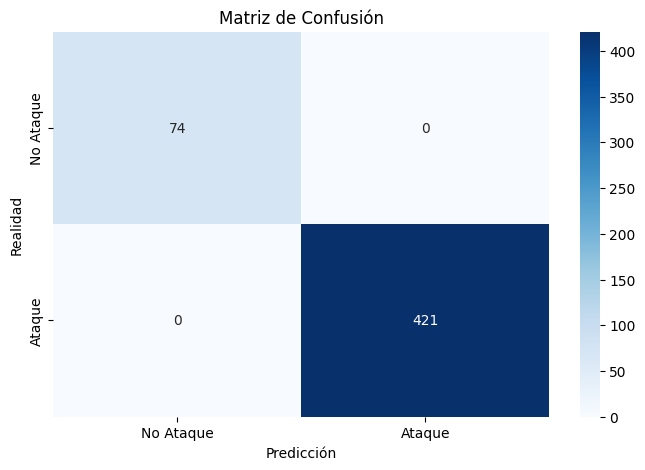

In [129]:
# Visualizo la matriz de confusión para ver cómo el modelo clasifica los datos
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Ataque', 'Ataque'], yticklabels=['No Ataque', 'Ataque'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()


In [130]:
# Obtengo las importancias de las características
importances = pipeline.named_steps['classifier'].feature_importances_


In [131]:
# Obtengo los nombres de las características después del preprocesamiento
# El preprocesador OneHotEncoder crea nuevas características
feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
# Concatenar los nombres de características numéricas con los nombres de características categóricas codificadas
all_feature_names = list(numeric_features) + list(feature_names)

In [132]:
#el número de importancias debe coincide con el número de nombres de características?
if len(importances) != len(all_feature_names):
    raise ValueError("El número de importancias no coincide con el número de nombres de características")

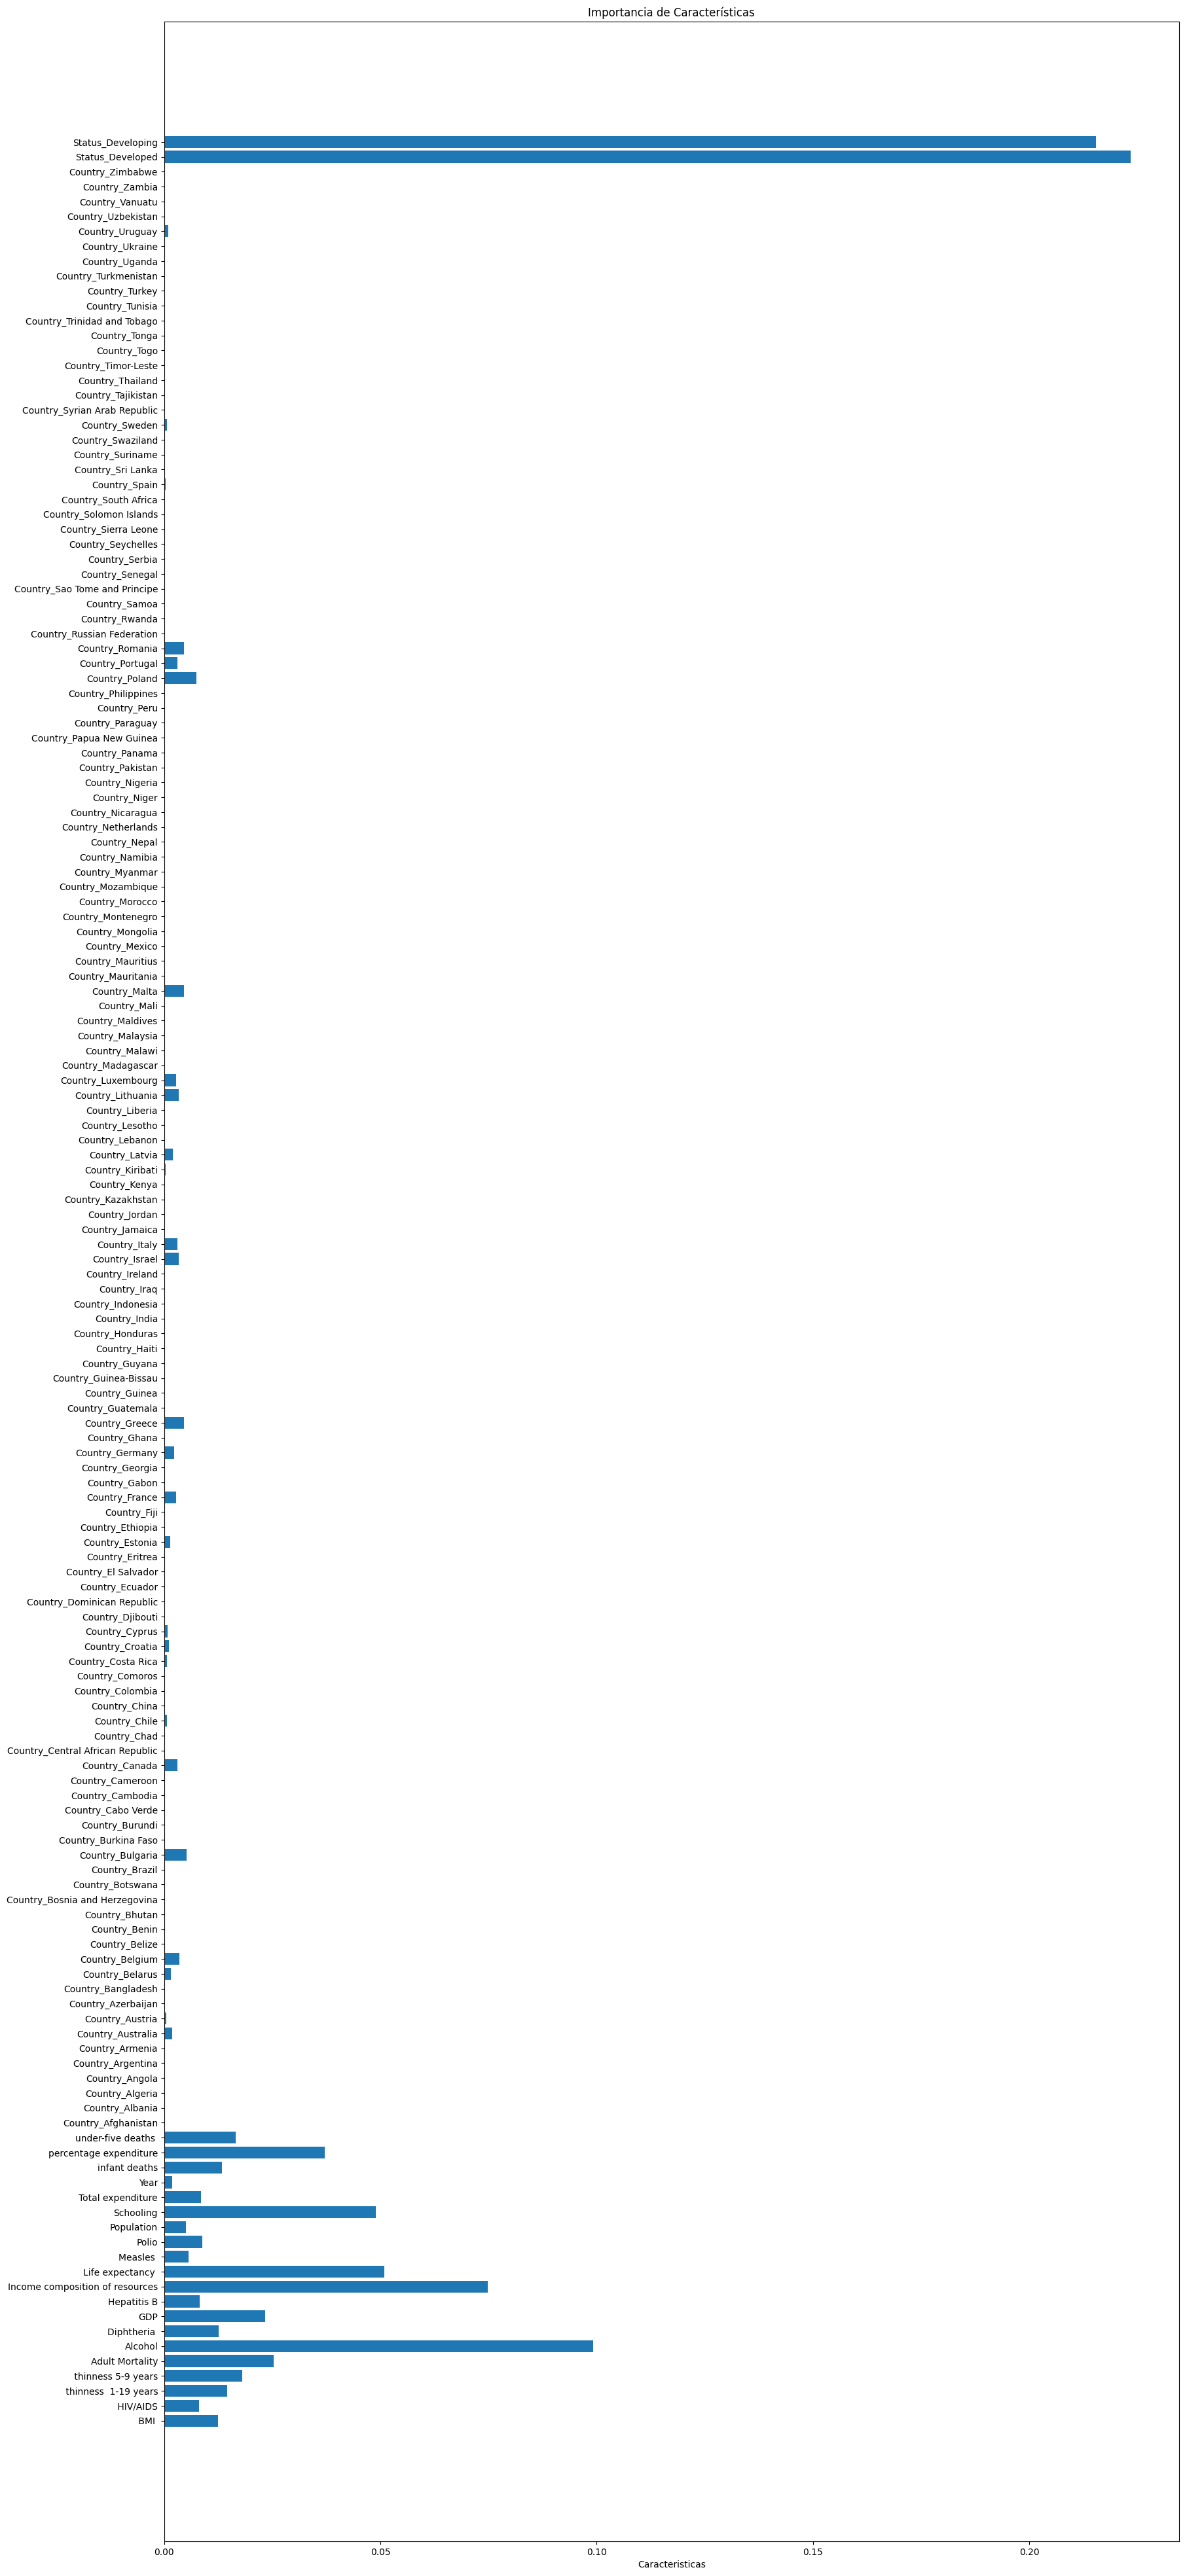

In [157]:
# Visualizo la importancia de las características para entender qué factores influyen más en el modelo
plt.figure(figsize=(20,50))
plt.barh(all_feature_names, importances)
plt.xlabel('Caracteristicas')
plt.title('Importancia de Características')
plt.show()

In [8]:
# Revisar las primeras filas del dataset para entender las variables disponibles
print(df.head())

# Revisar los nombres de las columnas y tipos de datos
print(df.info())

       Country  Year      Status  Esperanza de vida  Adult Mortality  \
0  Afghanistan  2015  Developing               65.0            263.0   
1  Afghanistan  2014  Developing               59.9            271.0   
2  Afghanistan  2013  Developing               59.9            268.0   
3  Afghanistan  2012  Developing               59.5            272.0   
4  Afghanistan  2011  Developing               59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0

In [19]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [20]:
# Vuelvo a cargar el dataset
df = pd.read_csv('heart_attack_prediction_dataset.csv')

In [21]:
# Renombro columnas para simplificar
df.rename(columns={
    'Life expectancy ': 'Esperanza de vida',
    'BMI ': 'IMC',
    'under-five deaths ': 'Muertes menores de cinco años',
    ' thinness  1-19 years': 'Delgadez 1-19 años',
    ' thinness 5-9 years': 'Delgadez 5-9 años',
    'Income composition of resources': 'Composición de ingresos de los recursos',
    'Measles ': 'Measles',
    ' BMI ': 'IMC',
    'Diphtheria ': 'Diphtheria',
    ' HIV/AIDS': 'HIV/AIDS'
}, inplace=True)


In [22]:
# Manejo valores faltantes
df.fillna(df.mean(numeric_only=True), inplace=True)  # Relleno valores faltantes numéricos con la media


In [23]:
# Relleno valores faltantes en columnas específicas
df['Hepatitis B'].fillna(df['Hepatitis B'].median(), inplace=True)
df['Alcohol'].fillna(df['Alcohol'].median(), inplace=True)
df['GDP'].fillna(df['GDP'].median(), inplace=True)
df['Population'].fillna(df['Population'].median(), inplace=True)

In [25]:
# Convierto variables categóricas (necesito valores numéricos)
df['Status'] = df['Status'].map({'Developing': 0, 'Developed': 1})

In [26]:
# Verifico los nombres de columnas
print("Nombres de columnas actuales:", df.columns)

Nombres de columnas actuales: Index(['Country', 'Year', 'Status', 'Esperanza de vida', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'IMC', 'Muertes menores de cinco años', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Delgadez 1-19 años', 'Delgadez 5-9 años',
       'Composición de ingresos de los recursos', 'Schooling'],
      dtype='object')


In [27]:
# Ajusto la lista de características
features = [
    'Adult Mortality', 'IMC', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles', 'Muertes menores de cinco años', 'Polio',
    'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
    'Delgadez 1-19 años', 'Delgadez 5-9 años', 'Composición de ingresos de los recursos',
    'Schooling'
]

In [28]:
# Selecciono las variables para el modelo
X = df[features]
y = df['Status']


In [29]:
# Divido el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Creo el clasificador de árbol de decisión con parámetros para un árbol más pequeño (podando)
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

Nombres de columnas actuales: Index(['Country', 'Year', 'Status', 'Esperanza de vida', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'IMC', 'Muertes menores de cinco años', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Delgadez 1-19 años', 'Delgadez 5-9 años',
       'Composición de ingresos de los recursos', 'Schooling'],
      dtype='object')
Accuracy: 0.9387755102040817
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       737
           1       0.75      0.94      0.84       145

    accuracy                           0.94       882
   macro avg       0.87      0.94      0.90       882
weighted avg       0.95      0.94      0.94       882



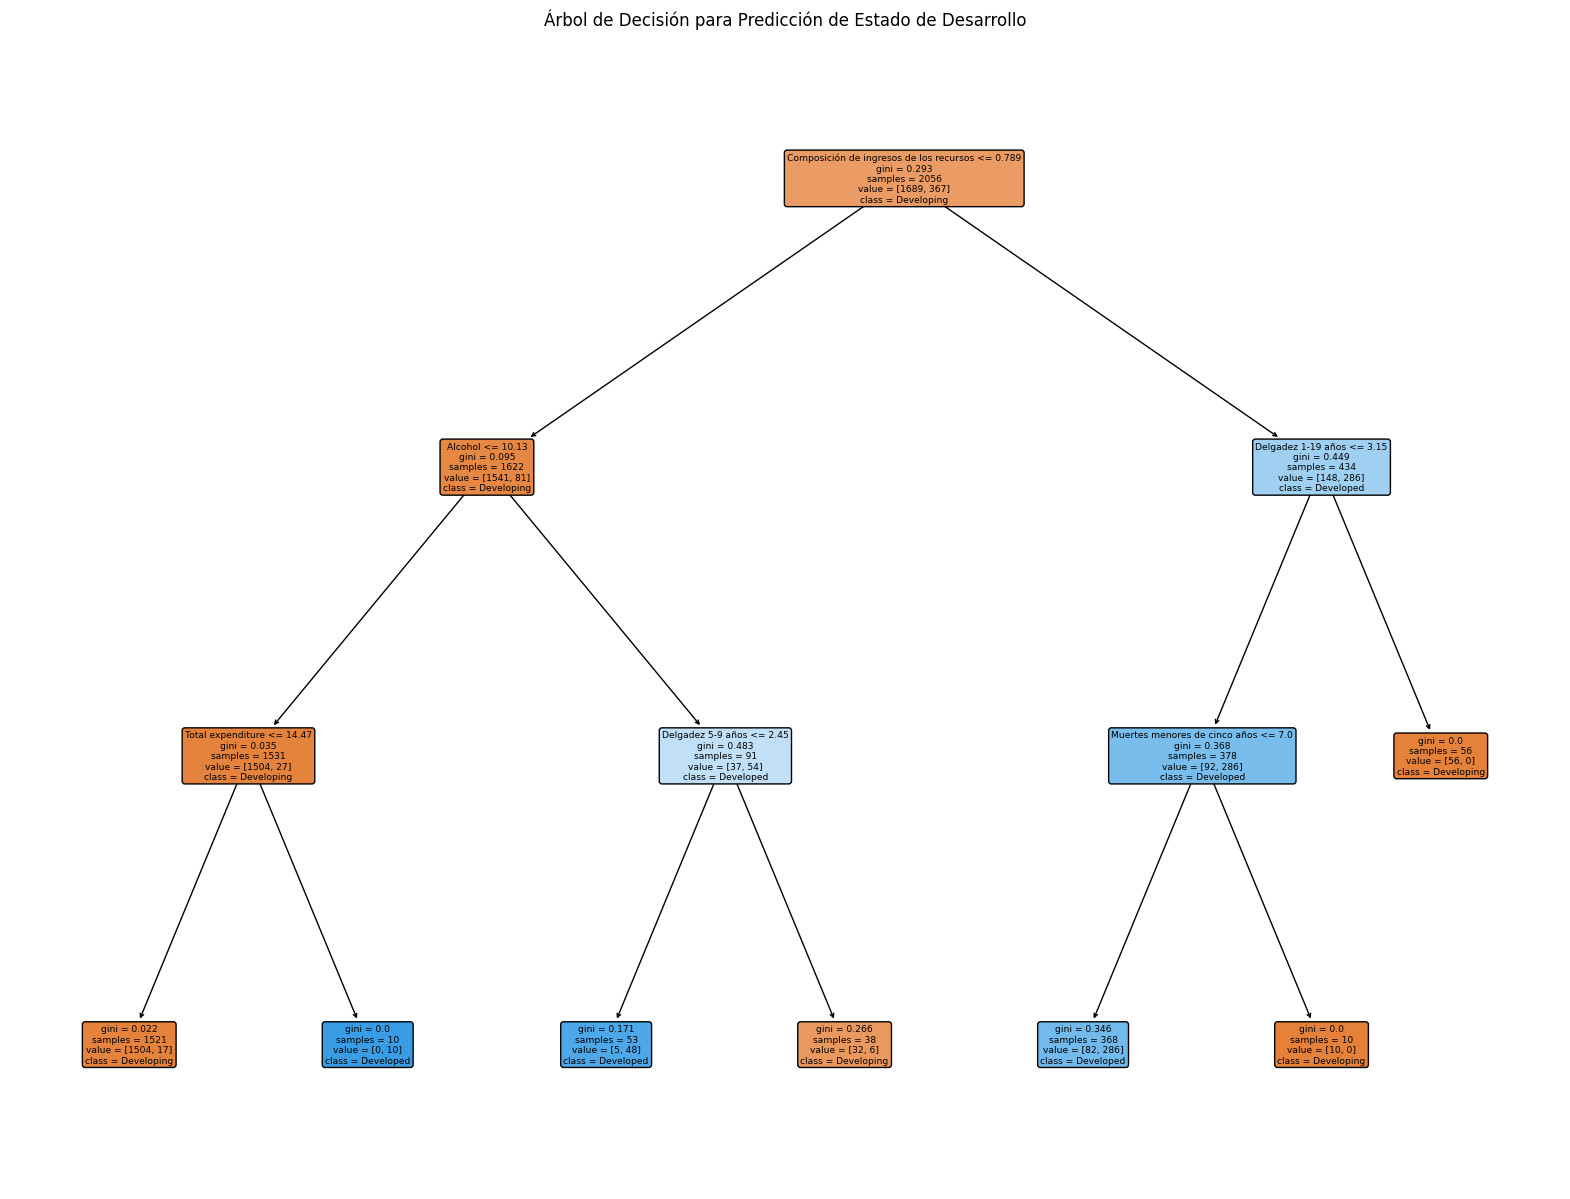

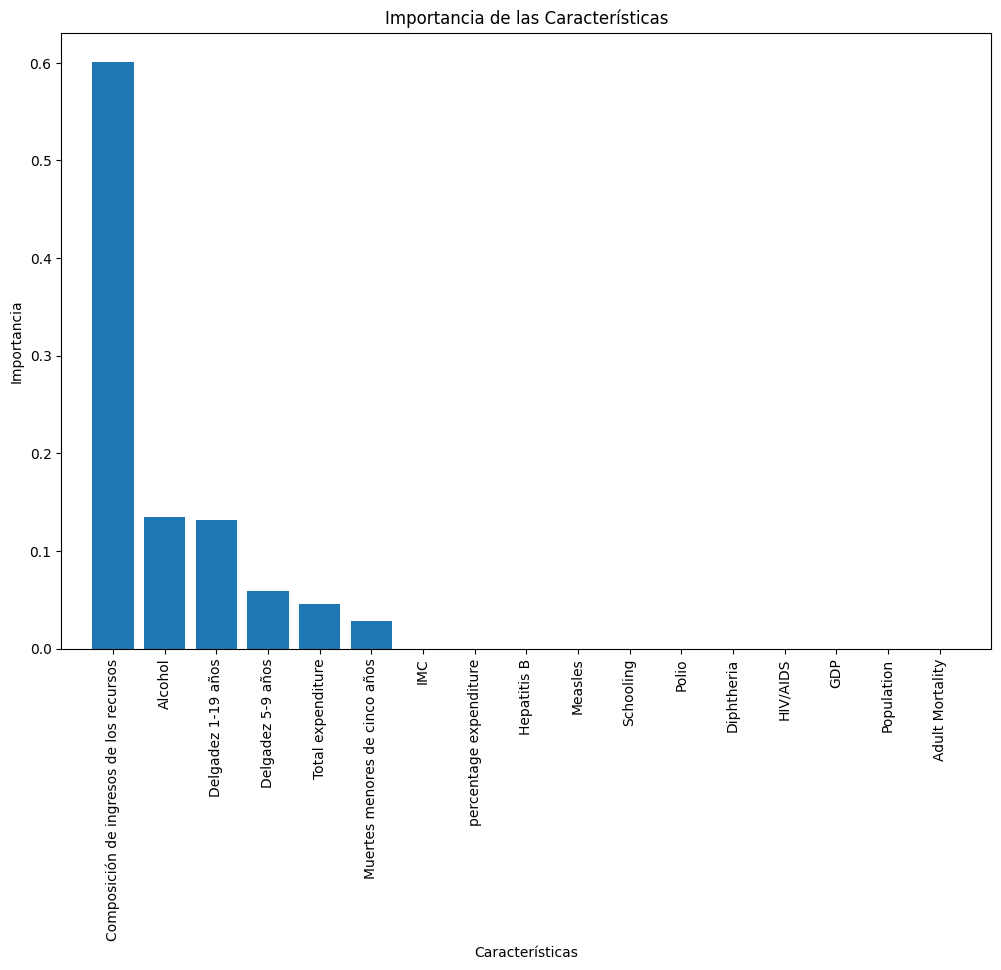

In [18]:
# Entreno el modelo
clf.fit(X_train, y_train)

# Evalúo el modelo
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualizo el árbol de decisión
plt.figure(figsize=(20, 15))
plot_tree(clf, feature_names=features, class_names=['Developing', 'Developed'], filled=True, rounded=True)
plt.title('Árbol de Decisión para Predicción de Estado de Desarrollo')
plt.show()

# Analizo la Importancia de las Características
def plot_feature_importance(model, features):
    importances = model.feature_importances_
    indices = importances.argsort()[::-1]

    plt.figure(figsize=(12, 8))
    plt.title('Importancia de las Características')
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.xlabel('Características')
    plt.ylabel('Importancia')
    plt.show()

# Visualizo la importancia de las características
plot_feature_importance(clf, features)